In [2]:
import torch
import scanpy as sc
import pandas as pd
import numpy as np
from tool.impute_metric import CalDataMetric
import warnings
warnings.filterwarnings("ignore")

In [3]:
DataDir="data/DataUpload/Dataset3/"
Spatial_file = DataDir + 'Insitu_count.txt'
raw_count = pd.read_csv(Spatial_file, header = 0, sep="\t")
raw_count = raw_count.loc[:,np.unique(raw_count.columns)]
raw_count.columns = [column.lower() for column in raw_count.columns]
print(raw_count)

      a730017c20rik  a830018l16rik  aw549877  aamp  abat  abhd3  acat2  ackr1  \
0               0.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   
1               0.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   
2               0.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   
3               0.0            0.0       0.0   0.0   1.0    0.0    0.0    0.0   
4               0.0            0.0       0.0   0.0   1.0    0.0    2.0    0.0   
...             ...            ...       ...   ...   ...    ...    ...    ...   
1544            0.0            0.0       0.0   0.0   1.0    0.0    2.0    0.0   
1545            0.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   
1546            1.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   
1547            0.0            0.0       0.0   3.0   0.0    0.0    0.0    0.0   
1548            0.0            0.0       0.0   0.0   0.0    0.0    0.0    0.0   

      acot13  acrbp  ...  y

In [3]:
coGCN_impute_count = pd.read_csv(DataDir + "results/coGCN_impute.csv", header = 0, index_col = 0)
coGCN_impute_count = coGCN_impute_count.loc[:,np.unique(coGCN_impute_count.columns)]
coGCN_impute_count.columns = [column.lower() for column in coGCN_impute_count.columns]

Tangram_impute_count = pd.read_csv(DataDir + "results/Tangram_impute.csv", header = 0, index_col = 0)
Tangram_impute_count = Tangram_impute_count.loc[:,np.unique(Tangram_impute_count.columns)]
Tangram_impute_count.columns = [column.lower() for column in Tangram_impute_count.columns]

LIGER_impute_count = pd.read_csv(DataDir + "results/LIGER_impute.csv", header = 0, index_col = 0)
LIGER_impute_count = LIGER_impute_count.loc[:,np.unique(LIGER_impute_count.columns)]
Index = [(int(x.replace('V', '')) -1) for x in LIGER_impute_count.index]
Index = sorted(Index)
LIGER_impute_count.index = Index
LIGER_impute_count.columns = [column.lower() for column in LIGER_impute_count.columns]

Seurat_impute_count = pd.read_csv(DataDir + "results/Seurat_impute.csv", header = 0, index_col = 0)
Seurat_impute_count = Seurat_impute_count.loc[:,np.unique(Seurat_impute_count.columns)]
Index = [(int(x) -1) for x in Seurat_impute_count.index]
Index = sorted(Index)
Seurat_impute_count.index = Index
Seurat_impute_count.columns = [column.lower() for column in Seurat_impute_count.columns]

novoSpaRc_impute_count = pd.read_csv(DataDir + "results/novoSpaRc_impute.csv", header = 0, index_col = 0)
novoSpaRc_impute_count = novoSpaRc_impute_count.loc[:,np.unique(novoSpaRc_impute_count.columns)]
novoSpaRc_impute_count.columns = [column.lower() for column in novoSpaRc_impute_count.columns]

SpaGE_impute_count = pd.read_csv(DataDir + "results/SpaGE_impute.csv", header = 0, index_col = 0)
SpaGE_impute_count = SpaGE_impute_count.loc[:,np.unique(SpaGE_impute_count.columns)]
SpaGE_impute_count.columns = [column.lower() for column in SpaGE_impute_count.columns]

SpaOTsc_impute_count = pd.read_csv(DataDir + "results/SpaOTsc_impute.csv", header = 0, index_col = 0)
SpaOTsc_impute_count = SpaOTsc_impute_count.loc[:,np.unique(SpaOTsc_impute_count.columns)]
SpaOTsc_impute_count.columns = [column.lower() for column in SpaOTsc_impute_count.columns]

stPlus_impute_count = pd.read_csv(DataDir + "results/stPlus_impute.csv", header = 0, index_col = 0)
stPlus_impute_count = stPlus_impute_count.loc[:,np.unique(stPlus_impute_count.columns)]
stPlus_impute_count.columns = [column.lower() for column in stPlus_impute_count.columns]


In [4]:
coGCN_result_metric=CalDataMetric(raw_count,coGCN_impute_count)
Tangram_result_metric=CalDataMetric(raw_count,Tangram_impute_count)
LIGER_result_metric=CalDataMetric(raw_count,LIGER_impute_count)
Seurat_result_metric=CalDataMetric(raw_count,Seurat_impute_count)
novoSpaRc_result_metric=CalDataMetric(raw_count,novoSpaRc_impute_count)
SpaGE_result_metric=CalDataMetric(raw_count,SpaGE_impute_count)
SpaOTsc_result_metric=CalDataMetric(raw_count,SpaOTsc_impute_count)
stPlus_result_metric=CalDataMetric(raw_count,stPlus_impute_count)

spots_pcc=pd.concat([coGCN_result_metric.iloc[0],Tangram_result_metric.iloc[0],LIGER_result_metric.iloc[0],Seurat_result_metric.iloc[0],
                    novoSpaRc_result_metric.iloc[0],SpaGE_result_metric.iloc[0],SpaOTsc_result_metric.iloc[0],stPlus_result_metric.iloc[0]],axis=1)
spots_pcc.columns=['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']

spots_ssim=pd.concat([coGCN_result_metric.iloc[1],Tangram_result_metric.iloc[1],LIGER_result_metric.iloc[1],Seurat_result_metric.iloc[1],
                    novoSpaRc_result_metric.iloc[1],SpaGE_result_metric.iloc[1],SpaOTsc_result_metric.iloc[1],stPlus_result_metric.iloc[1]],axis=1)
spots_ssim.columns=['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']

spots_cossim=pd.concat([coGCN_result_metric.iloc[2],Tangram_result_metric.iloc[2],LIGER_result_metric.iloc[2],Seurat_result_metric.iloc[2],
                    novoSpaRc_result_metric.iloc[2],SpaGE_result_metric.iloc[2],SpaOTsc_result_metric.iloc[2],stPlus_result_metric.iloc[2]],axis=1)
spots_cossim.columns=['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']

spots_rmse=pd.concat([coGCN_result_metric.iloc[3],Tangram_result_metric.iloc[3],LIGER_result_metric.iloc[3],Seurat_result_metric.iloc[3],
                    novoSpaRc_result_metric.iloc[3],SpaGE_result_metric.iloc[3],SpaOTsc_result_metric.iloc[3],stPlus_result_metric.iloc[3]],axis=1)
spots_rmse.columns=['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']

spots_jsd=pd.concat([coGCN_result_metric.iloc[4],Tangram_result_metric.iloc[4],LIGER_result_metric.iloc[4],Seurat_result_metric.iloc[4],
                    novoSpaRc_result_metric.iloc[4],SpaGE_result_metric.iloc[4],SpaOTsc_result_metric.iloc[4],stPlus_result_metric.iloc[4]],axis=1)
spots_jsd.columns=['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix

We are calculating the : impute matrix



In [5]:
mean_spots_pcc=spots_pcc.mean(0)
mean_spots_ssim=spots_ssim.mean(0)
mean_spots_rmse=spots_rmse.mean(0)
mean_spots_jsd=spots_jsd.mean(0)
mean_spots_cossim=spots_cossim.mean(0)
df=pd.DataFrame({"pcc":mean_spots_pcc,"ssim":mean_spots_ssim,"rmse":mean_spots_rmse,
                "jsd":mean_spots_jsd,"cossim":mean_spots_cossim})
print(df)
# df.to_csv(DataDir+'results/final_result.txt')

                   pcc      ssim      rmse       jsd    cossim
SpatialcoGCN  0.238628  0.214820  1.181394  0.394794  0.409382
Tangram       0.236461  0.098857  1.231968  0.406046  0.437646
LIGER         0.114918  0.066051  1.326564  0.464684  0.304116
Seurat        0.121191  0.102490  1.321841  0.455448  0.317695
novoSpaRc     0.061203  0.039829  1.367961  0.437481  0.367601
SpaGE         0.201815  0.144942  1.257646  0.431175  0.360530
SpaOTsc       0.099213  0.074209  1.338444  0.450979  0.328694
stPlus        0.065431  0.047322  1.363835  0.521049  0.297753


In [6]:
final_result=df
ordered_result=pd.DataFrame(np.ones((final_result.shape[1],final_result.shape[0])),columns=final_result.index,index=final_result.columns)
ordered_result.iloc[0,:]=final_result.iloc[:,0].rank(ascending = True,method='first')
ordered_result.iloc[1,:]=final_result.iloc[:,1].rank(ascending = True,method='first')
ordered_result.iloc[2,:]=final_result.iloc[:,2].rank(ascending = False,method='first')
ordered_result.iloc[3,:]=final_result.iloc[:,3].rank(ascending = False,method='first')
ordered_result.iloc[4,:]=final_result.iloc[:,4].rank(ascending = True,method='first')
ordered_result=ordered_result/8
ordered_result.loc["AVR"]=ordered_result.mean(0)
print(ordered_result)

        SpatialcoGCN  Tangram  LIGER  Seurat  novoSpaRc  SpaGE  SpaOTsc  \
pcc            1.000    0.875  0.500   0.625      0.125  0.750    0.375   
ssim           1.000    0.625  0.375   0.750      0.125  0.875    0.500   
rmse           1.000    0.875  0.500   0.625      0.125  0.750    0.375   
jsd            1.000    0.875  0.250   0.375      0.625  0.750    0.500   
cossim         0.875    1.000  0.250   0.375      0.750  0.625    0.500   
AVR            0.975    0.850  0.375   0.550      0.350  0.750    0.450   

        stPlus  
pcc      0.250  
ssim     0.250  
rmse     0.250  
jsd      0.125  
cossim   0.125  
AVR      0.200  


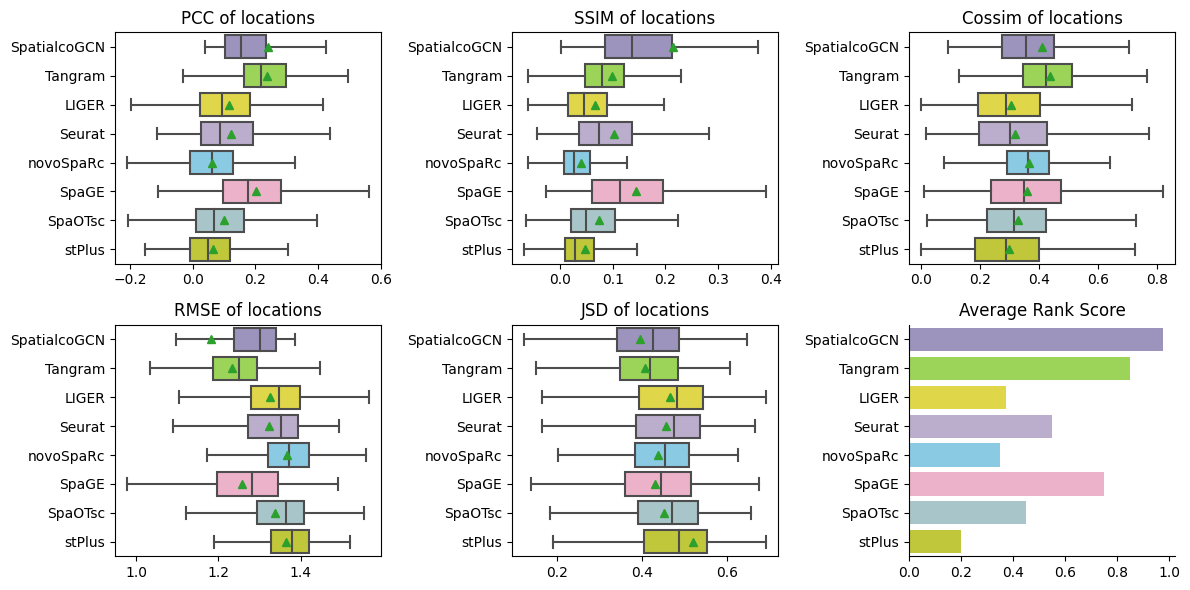

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(12,6))
order = ['SpatialcoGCN','Tangram','LIGER','Seurat','novoSpaRc','SpaGE','SpaOTsc','stPlus']
colors = ["#988DC3","#9de846", '#F9EC31', "#BBA8D1", "#7BD1F1", "#F5A8C7",  "#A2CBCF","#D6DE23","#1AB5B7"]
sns.boxplot(data=spots_pcc,order=order,palette=colors,ax=axes[0,0],orient='h', showfliers = False,showmeans=True)
axes[0,0].set_title('PCC of locations')
sns.boxplot(data=spots_ssim,order=order,palette=colors,ax=axes[0,1],orient='h', showfliers = False,showmeans=True)
axes[0,1].set_title('SSIM of locations')
sns.boxplot(data=spots_rmse,order=order,palette=colors,ax=axes[1,0],orient='h', showfliers = False,showmeans=True)
axes[1,0].set_title('RMSE of locations')
sns.boxplot(data=spots_jsd,order=order,palette=colors,ax=axes[1,1],orient='h', showfliers = False,showmeans=True)
axes[1,1].set_title('JSD of locations')
sns.boxplot(data=spots_cossim,order=order,palette=colors,ax=axes[0,2],orient='h', showfliers = False,showmeans=True)
axes[0,2].set_title('Cossim of locations')

sns.barplot(data=ordered_result.iloc[[-1],:],order=order,palette=colors,ax=axes[1,2],orient='h',errorbar=('ci', 75))
axes[1,2].set_title('Average Rank Score')
axes[1,2].spines['top'].set_visible(False)
axes[1,2].spines['right'].set_visible(False)

#plt.delaxes(axes[1, 2])
plt.tight_layout()
# plot_file = os.path.join(DataDir+"results/metrics_plot.pdf")
# fig.savefig(plot_file,dpi=600,bbox_inches = "tight")
plt.show()